                      Data  Quantidade  Preco_Unitario       Receita
count                  200  200.000000       200.00000    200.000000
mean   2024-04-09 12:00:00    4.725000      2369.50000  11883.000000
min    2024-01-01 00:00:00    1.000000       800.00000    800.000000
25%    2024-02-19 18:00:00    2.000000       800.00000   3200.000000
50%    2024-04-09 12:00:00    4.500000      1500.00000   7200.000000
75%    2024-05-29 06:00:00    7.000000      3000.00000  18000.000000
max    2024-07-18 00:00:00    9.000000      5000.00000  45000.000000
std                    NaN    2.663616      1540.02537  11377.311947
Produto
Tablet      54
Monitor     54
Notebook    46
Celular     46
Name: count, dtype: int64
Produto
Monitor     682000
Tablet      637700
Celular     576200
Notebook    480700
Name: Receita, dtype: int64


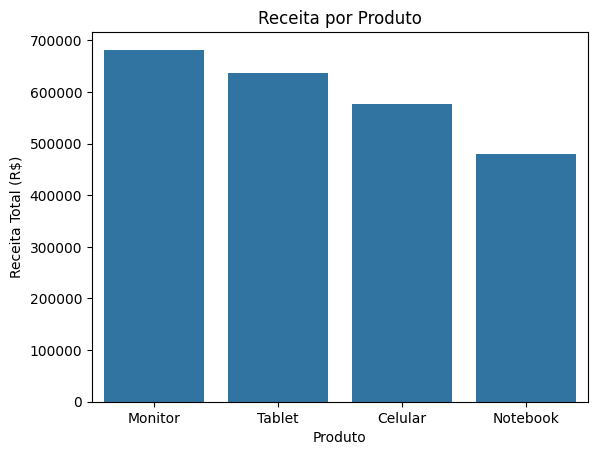

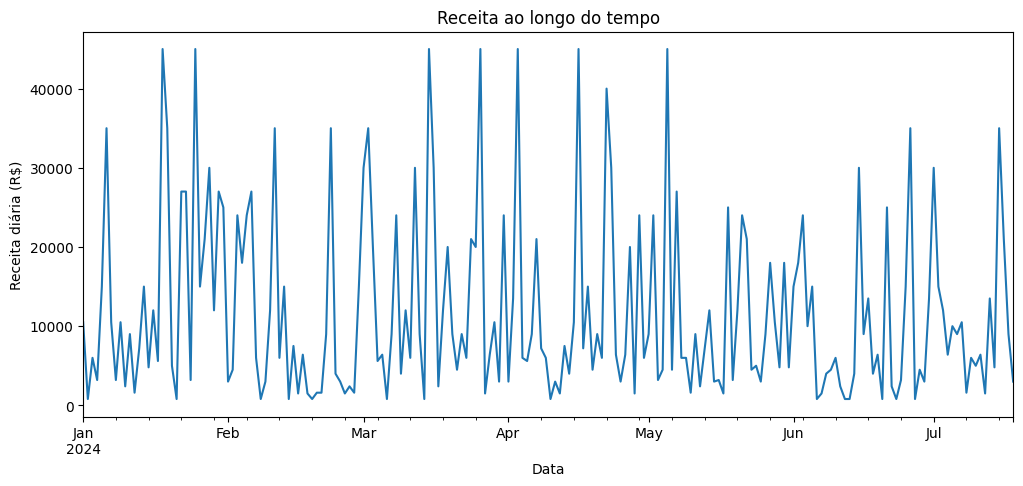

Data
2024-01-25    45000
2024-01-18    45000
2024-03-26    45000
2024-05-05    45000
2024-04-16    45000
Name: Receita, dtype: int64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reprodutibilidade
np.random.seed(42)

# Criar dados fictícios
n = 200
dados = {
    "Data": pd.date_range(start="2024-01-01", periods=n, freq="D"),
    "Produto": np.random.choice(["Notebook", "Celular", "Tablet", "Monitor"], size=n),
    "Quantidade": np.random.randint(1, 10, size=n),
    "Preco_Unitario": np.random.choice([1500, 3000, 5000, 800], size=n)
}

df = pd.DataFrame(dados)
df["Receita"] = df["Quantidade"] * df["Preco_Unitario"]

df.head()


print(df.describe())
print(df["Produto"].value_counts())

receita_produto = df.groupby("Produto")["Receita"].sum().sort_values(ascending=False)
print(receita_produto)

sns.barplot(x=receita_produto.index, y=receita_produto.values)
plt.title("Receita por Produto")
plt.ylabel("Receita Total (R$)")
plt.show()

df_diario = df.groupby("Data")["Receita"].sum()

plt.figure(figsize=(12, 5))
df_diario.plot()
plt.title("Receita ao longo do tempo")
plt.ylabel("Receita diária (R$)")
plt.xlabel("Data")
plt.show()

top5 = df.groupby("Data")["Receita"].sum().sort_values(ascending=False).head(5)
print(top5)